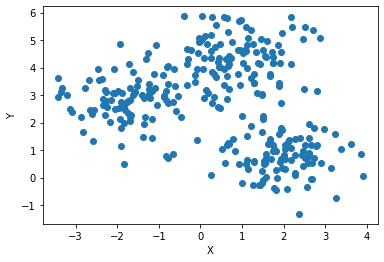

In [1]:
#Your turn
#The samples are comming from 3 gaussian distributions, 
#please find the source of each cluster & the corresponding parameter
#mu & sigma
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('raw_data.csv',index_col=0)
plt.scatter(df['X'],df['Y'])
plt.xlabel('X');
plt.ylabel('Y');

In [2]:
len(df)

300

## 1 构造3个一维高斯的混合模型

In [3]:
import numpy as np
import seaborn as sns
from math import exp
from math import pi
from math import sqrt

   

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:ylabel='Density'>

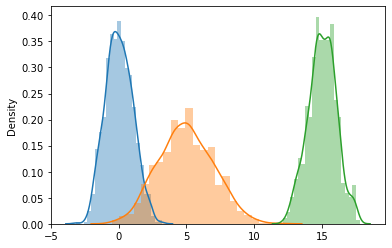

In [4]:
G1 = list(np.random.normal(loc= 0.0, scale=1, size = 1000))
G2 = list(np.random.normal(loc= 5.0, scale=2, size = 1000))
G3 = list(np.random.normal(loc= 15.0, scale=1, size = 1000))
all = G1 + G2 + G3

sns.distplot(G1)
sns.distplot(G2)
sns.distplot(G3)
# sns.distplot(all)

In [5]:
K = 3
episilon = 1e-3
mu = [1, 2, 3]
sigma2 = [1, 1, 1]
alpha = [1/3, 1/3, 1/3]


def Gaussian_1D(x, mu, sigma):
    return (sqrt(2* pi)*sigma)**(-1) * exp(- (x-mu)**2 / (2*sigma**2))

In [6]:
for train in range(10):
    
    # E-step -- calculate the probability of every data point x_i coming from dist_k
    print("\nround",train)
    gamma = []
    for x in all:
        gamma.append([alpha[i] * Gaussian_1D(x, mu[i], sigma2[i]) for i in range(K) ])

    for i in range(len(gamma)):
        s = sum(gamma[i])
        for k in range(K):
            gamma[i][k] /= s
            
            
    segments = [[],[],[]]
    for i in range(len(gamma)):
        segments[gamma[i].index(max(gamma[i]))].append(all[i])

    # update mu

    for k in range(K):
        up = 0
        down = 0
        for j in range(len(segments[k])):
            up += gamma[j][k] * segments[k][j]
            down += gamma[j][k]
            
        mu_old = mu[k]
        mu[k] = up / down
        print('mu\t',k,'\t',mu_old,'\t', mu[k])

    # update sigma^2

    for k in range(K):
        up = 0
        down = 0
        for j in range(len(segments[k])):
            up += gamma[j][k] * ( segments[k][j] - mu[k] ) **2
            down += gamma[j][k]

        sigma2_old = sigma2[k]
        sigma2[k] = up/down
        print('sigma\t',k,'\t',sigma2_old,'\t', sigma2[k])

    # update alpha

    for k in range(K):
        s = 0
        for j in range(len(gamma)):
            s += gamma[j][k]
        alpha_old = alpha[k]
        alpha[k] = s / len(gamma)
        print('alpha\t', k,'\t', alpha_old,'\t', alpha[k])


round 0
mu	 0 	 1 	 -0.08944467809338046
mu	 1 	 2 	 1.9529341609306
mu	 2 	 3 	 14.49448565027295
sigma	 0 	 1 	 0.7585429757794889
sigma	 1 	 1 	 0.088527355535686
sigma	 2 	 1 	 5.8973749437507506
alpha	 0 	 0.3333333333333333 	 0.2684963868882196
alpha	 1 	 0.3333333333333333 	 0.11608617856123025
alpha	 2 	 0.3333333333333333 	 0.6154174345505502

round 1
mu	 0 	 -0.08944467809338046 	 -0.018049027528844047
mu	 1 	 1.9529341609306 	 1.993125487392096
mu	 2 	 14.49448565027295 	 14.471548838700397
sigma	 0 	 0.7585429757794889 	 0.838127048912793
sigma	 1 	 0.088527355535686 	 0.006029009866488965
sigma	 2 	 5.8973749437507506 	 6.428017717679336
alpha	 0 	 0.2684963868882196 	 0.32128510097549523
alpha	 1 	 0.11608617856123025 	 0.02210955767787078
alpha	 2 	 0.6154174345505502 	 0.6566053413466346

round 2
mu	 0 	 -0.018049027528844047 	 0.014693531768418625
mu	 1 	 1.993125487392096 	 nan
mu	 2 	 14.471548838700397 	 14.372729544081544
sigma	 0 	 0.838127048912793 	 0.922230741

<ipython-input-6-4e91c3f0a058>:29: RuntimeWarning: invalid value encountered in double_scalars
  mu[k] = up / down


ZeroDivisionError: division by zero

In [ ]:
segments

In [ ]:

sns.distplot(segments[0])
sns.distplot(segments[1])
sns.distplot(segments[2])

In [ ]:
len(gamma)

In [ ]:
mu, sigma2, alpha

In [ ]:
P1 = list(np.random.normal(loc= mu[0], scale=sigma2[0], size = 100))
P2 = list(np.random.normal(loc= mu[1], scale=sigma2[1], size = 100))
P3 = list(np.random.normal(loc= mu[2], scale=sigma2[2], size = 100))

sns.distplot(P1)
sns.distplot(P2)
sns.distplot(P3)

In [ ]:
list = [1,5,2,6,2]
list.index(max(list))

## 2 分离一维高斯混合模型